# Embedding dimension

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from multiprocessing import Pool
import time
from tqdm import tqdm

from graph_generation import create_ER, dataset_nclass_ER
from models import GCN, GCNEmbed
from train import Trainer
from embedding import Embedding
from experiments import experiment_embedding

import torch
from torch_geometric.loader import DataLoader
device = torch.device('cuda')

from scipy import stats

import yaml

In [3]:
config = yaml.safe_load(open("configs.yml"))

In [5]:
dataset_grafi_nx, dataset_labels, list_p= dataset_nclass_ER(config)

Mean connectivity for each node: 4.908 p=0.05
Mean connectivity for each node: 19.819 p=0.2
Mean connectivity for each node: 29.682 p=0.3
Mean connectivity for each node: 39.642 p=0.4
Mean connectivity for each node: 49.484 p=0.5
Mean connectivity for each node: 59.361 p=0.6


In [6]:
model = GCN(neurons_per_layer=config['model']['neurons_per_layer'],
                    num_classes=len(config['graph_dataset']['list_p']))

In [7]:
model._modules['convs']

ModuleList(
  (0): GCNConv(1, 64)
  (1): GCNConv(64, 64)
  (2): GCNConv(64, 30)
  (3): GCNConv(30, 1)
)

In [8]:
embeddings = experiment_embedding(config, dataset_grafi_nx, dataset_labels, list_p)

GCN(
  (convs): ModuleList(
    (0): GCNConv(1, 64)
    (1): GCNConv(64, 64)
    (2): GCNConv(64, 30)
    (3): GCNConv(30, 1)
  )
)
MSELoss()
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████| 1200/1200 [00:17<00:00, 67.44it/s]


Tempo impiegato: 17.894984483718872
runs/lr-0.005_epochs500_bs150_layers5_neurons[1, 64, 64, 30, 1]_lln1/23May_10-23-13
Non serve calcolare le distanze nel caso di embedding scalare


In [9]:
embeddings.embeddings_array.shape

(1200, 1)

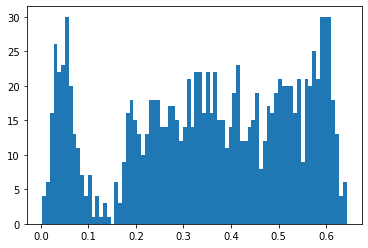

In [10]:
plt.hist(embeddings.embeddings_array, bins=80);

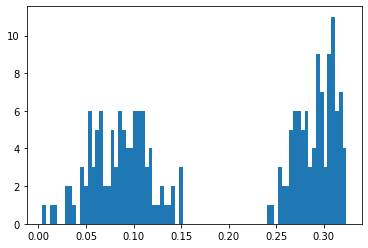

sovrapporre la distrib vera del dataset

 # Caso con n classi
 

In [34]:
config = yaml.safe_load(open("configs.yml"))

In [35]:
dataset_grafi_nx, dataset_labels, list_p = dataset_nclass_ER(config)

Mean connectivity for each node: 4.973 p=0.05
Mean connectivity for each node: 19.781 p=0.2
Mean connectivity for each node: 29.729 p=0.3


In [36]:
embeddings = experiment_embedding(config, dataset_grafi_nx, dataset_labels, list_p)

GCN(
  (convs): ModuleList(
    (0): GCNConv(1, 64)
    (1): GCNConv(64, 30)
    (2): GCNConv(30, 1)
  )
)
MSELoss()
Loading Dataset...


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:11<00:00, 130.62it/s]


Tempo impiegato: 11.576738357543945
runs/lr-0.005_epochs500_bs150_layers4_neurons[1, 64, 30, 1]_lln1/20May_16-07-11
Non serve calcolare le distanze nel caso di embedding scalare


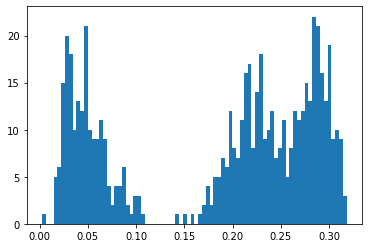

In [6]:
plt.hist(embeddings.embeddings_array, bins=80);

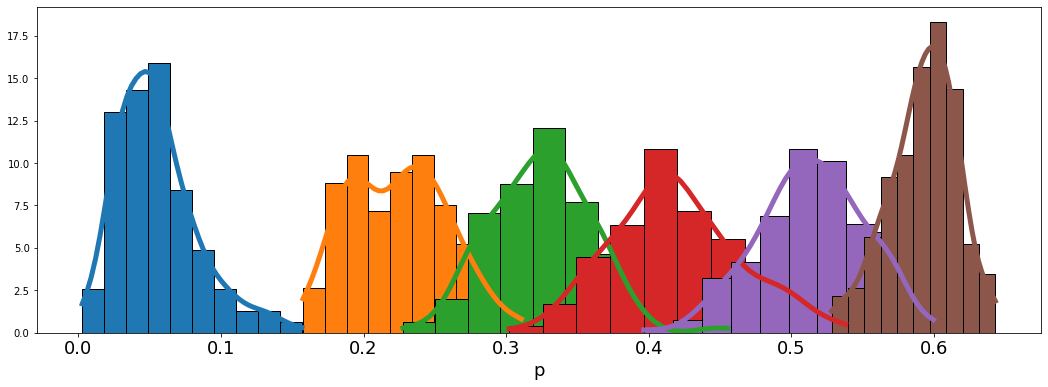

In [16]:
plt.figure(figsize=(18, 6)) #, dpi=60)
for p in list_p:
    mask_int = np.argwhere(embeddings.embedding_labels==p).flatten()
    emb = embeddings.embeddings_array[mask_int].flatten()
    
    h,e = np.histogram(emb, bins=10, density=True)
    x = np.linspace(e.min(), e.max())
    plt.bar(e[:-1], h, width=np.diff(e), ec='k', align='edge', label='histogram')

    kde = stats.gaussian_kde(emb)
    plt.plot(x, kde.pdf(x),  lw=5, label='KDE')
    
plt.xlabel('p', fontsize=18)
plt.xticks(fontsize=18) 
plt.show()

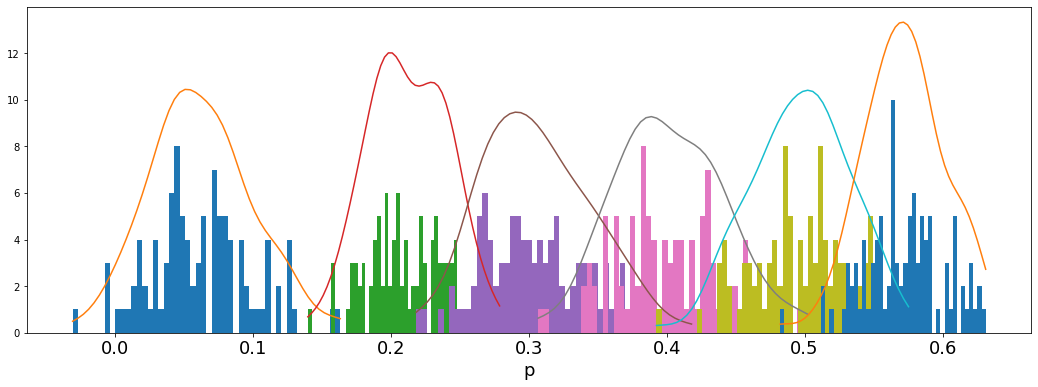

aumentare il numero di grafi nel dataset

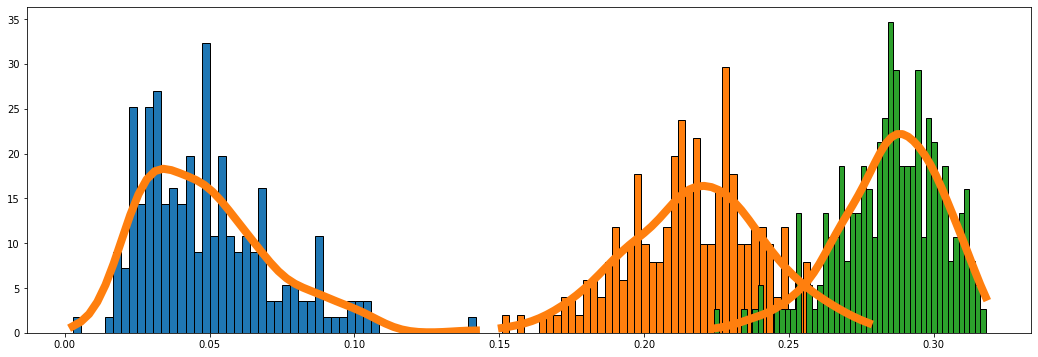

In [23]:
plt.figure(figsize=(18, 6)) #, dpi=60)
for p in list_p:
    mask_int = np.argwhere(embeddings.embedding_labels==p).flatten()
    emb = embeddings.embeddings_array[mask_int].flatten()
    h,e = np.histogram(emb, bins=50, density=True)
    x = np.linspace(e.min(), e.max())
    plt.bar(e[:-1], h, width=np.diff(e), ec='k', align='edge', label='histogram')

    # plot the real KDE
    kde = stats.gaussian_kde(emb)
    plt.plot(x, kde.pdf(x), c='C1', lw=8, label='KDE')